# Preprocessing for CCL (Connected Component Labeling)

In [1]:
from PIL import Image
import numpy as np

In [2]:
# Convert image to binary image, prereq for Connected Component Labeling
img = Image.open('img.png').convert("1", dither=Image.NONE)

In [3]:
img_arr = np.asarray(img)

# CCL Function, takes an image, returns, a new array with labels

In [4]:
def ccl(image):
    # Convert image to numpy array
    d = np.array(image)
    # Create a blank image array
    d_f = np.zeros(d.shape)
    # Initialize a label value variable
    l_v = 0
    # A dictionary to keep track of parents of a label 
    p = {}
    # Loop through each pixel of the given image.
    for i in range(d.shape[0]):
        for j in range(d.shape[1]):
            # If the current pixel is not background.
            if d[i][j] != 0:
                # For the very first pixel initialize the pixel with label
                if i == 0 and j == 0:
                    l_v += 1
                    d_f[i][j] = l_v
                # For the first row
                elif i == 0:
                    # Assign the value to the left.
                    if d_f[i][j-1] != 0:
                        d_f[i][j] = d_f[i][j-1]
                    # Assign a new label if the pixel to the left is background.
                    else:
                        l_v += 1
                        d_f[i][j] = l_v
                # For the first column
                elif j == 0:
                    # Assign the value of the above pixel
                    if d_f[i-1][j] != 0:
                        d_f[i][j] = d_f[i-1][j]
                    # Assign a new label if the pixel above is background
                    else:
                        l_v += 1
                        d_f[i][j] = l_v
                # If the current pixel is surrounded by backgrounds,
                # assign new label value.
                elif d_f[i-1][j] == 0 and d_f[i][j-1] == 0:
                    l_v += 1
                    d_f[i][j] = l_v
                # Else assign an existing label to the current pixel
                else:
                    # If the pixel above has smaller label,
                    # assign it to the current label and
                    # and record that the label to the left 
                    # has the label above as parent. Also make
                    # sure that the label above is not background
                    if d_f[i-1][j] < d_f[i][j-1] and d_f[i-1][j] != 0:
                        d_f[i][j] = d_f[i-1][j]
                        if d_f[i][j-1] != 0:
                            if d_f[i][j-1] not in p:
                                p[d_f[i][j-1]] = {d_f[i-1][j]}
                            else:
                                p[d_f[i][j-1]].add(d_f[i-1][j])
                    # Else if the pixel to the left has smaller label,
                    # assign it to the current label and
                    # and record that the label above 
                    # has the label to the left as parent. Also make
                    # sure that the label to the left is not background
                    elif d_f[i][j-1] < d_f[i-1][j] and d_f[i][j-1] != 0:
                        d_f[i][j] = d_f[i][j-1]
                        if d_f[i-1][j] != 0:
                            if d_f[i-1][j] not in p:
                                p[d_f[i-1][j]] = {d_f[i][j-1]}
                            else:
                                p[d_f[i-1][j]].add(d_f[i][j-1])
                    # In case one of the pixels is background and 
                    # above conditions were not satisfied.
                    else:
                        d_f[i][j] = d_f[i][j-1] if d_f[i][j-1] != 0 else d_f[i-1][j]

    # Important for second pass, the parent for the given label
    # If the label is not entered in the dictionary, then it is a label itself.
    def findParent(parents, p):
        # Check for all the parents.
        for parent in parents:
            if parent not in p:
                return parent
        # The parent with the minimum label value is more likely closer to root.
        return findParent(list(p[min(parents)]), p)

    # Second pass, replace the labels with their parents.
    for i in range(d.shape[0]):
        for j in range(d.shape[1]):
            d_f[i][j] = findParent(list(p[d_f[i][j]]), p) if d_f[i][j] in p else d_f[i][j]
    return d_f               
        
n_img_arr = ccl(img_arr)          

# Generate a randomly generated coloured image

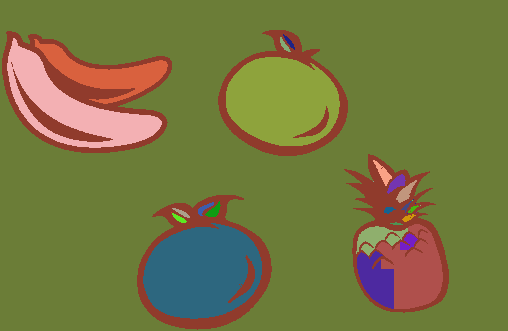

In [5]:
from random import randint
# Generate random colors for an RGB image.
def generateRandomColor():
    return [randint(0,255), randint(0,255), randint(0,255)]
def createImage(ccl_img_arr):
    # Create a dictionary that keeps record of randomly generated colour for each region (component)
    colors = dict()
    # Generate random colour for each region
    for i in np.unique(ccl_img_arr):
        if i == 0:
            colors[i] = [0,0,0]
        colors[i] = generateRandomColor()
    n_img = np.zeros(ccl_img_arr.shape + (3,))
    # Assign random colors, to each region
    for i in range(0, 3):
        for j in range(0, n_img[:,:,i].shape[0]):
            for k in range(0, n_img[:,:,i].shape[1]):
                n_img[j,k,i] = colors[ccl_img_arr[j][k]][i]
    # Convert array to RGB image, make sure to change the datatype to uint8
    # because currently the data may be in floats.
    n_img = Image.fromarray(np.array(n_img, dtype='uint8'), 'RGB')
    # return the new image.
    return n_img

createImage(n_img_arr)